In [61]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [138]:
n = 200
d = 5


def generate_expander(n, d, lam=np.inf, trials_so_far=0, trials=10, return_lams=False):
    trials -= trials_so_far
    G_res = None
    lams = []
    for t in tqdm(range(trials)):
        G = nx.random_regular_graph(d=d, n=n)
        A = nx.adjacency_matrix(G).toarray()
        eig = np.linalg.eig(A)[0]
        eig_abs_sorted = sorted(np.abs(eig))
        l2 = eig_abs_sorted[-2]
        if l2 <= lam:
            G_res = G
            lam = l2
        lams.append(lam)
    if return_lams:
        return G_res, lam, lams
    else:
        return G_res, lam


G, lam = generate_expander(n, d, trials=100)

print(lam)

# nx.draw(G)

100%|██████████| 100/100 [00:02<00:00, 42.57it/s]

3.8687759077430717


 69%|██████▉   | 11/16 [00:02<00:01,  4.37it/s]


KeyboardInterrupt: 

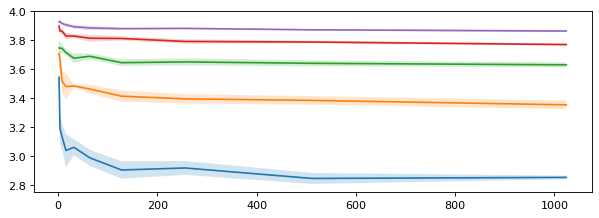

In [92]:
ts = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# ts = [2, 4, 8]

seeds = 5

plt.figure(figsize=(9, 3), dpi=80)

for n in [16, 32, 64, 128, 256, 512]:
    lams_all = []
    for s in range(seeds):
        lams = []
        for t in ts:
            G, lam = generate_expander(n, d, trials=t)
            lams.append(lam)
        lams_all.append(lams)

    lams_all = np.array(lams_all)
    mean = lams_all.mean(axis=0)
    std = lams_all.std(axis=0)
    plt.plot(ts, lams_all.mean(axis=0), label=rf"$n={n}$")
    plt.fill_between(ts, mean - std, mean + std, alpha=0.2)

plt.xscale("log")
plt.ylabel(r"$|\lambda_2|$")
plt.xlabel(f"number of {d}-regular random graphs evaluated")
plt.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("/Users/nick11roberts/Desktop/n_scaling.pdf")
plt.show()

In [107]:
import matplotlib.pyplot as plt
import numpy as np


def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

<ipython-input-107-154dd3b04c37>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base = plt.cm.get_cmap(base_cmap)
100%|██████████| 130/130 [00:21<00:00,  5.92it/s]


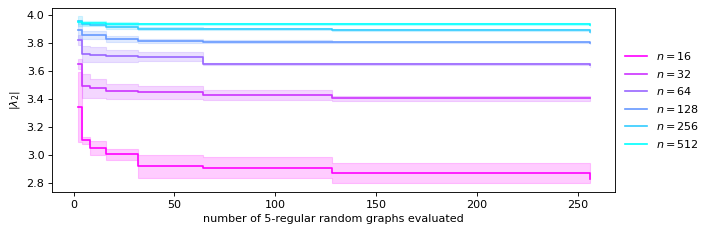

In [120]:
# ts = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
ts = [2, 4, 8, 16, 32, 64, 128, 256]

# ns = [16, 32, 64, 128, 256, 512]
ns = [16, 32, 64, 128, 256, 512]
c = discrete_cmap(len(ns), base_cmap="cool").reversed()

seeds = 3

plt.figure(figsize=(9, 3), dpi=80)

for i, n in enumerate(ns):
    lams_all = []
    for s in range(seeds):
        lams = []
        for j, t in enumerate(ts):
            if j > 0:
                G, lam = generate_expander(
                    n, d, lam=lams[-1], trials_so_far=sum(ts[: j - 1]), trials=t
                )
            else:
                G, lam = generate_expander(n, d, trials=t)
            lams.append(lam)
        lams_all.append(lams)

    lams_all = np.array(lams_all)
    mean = lams_all.mean(axis=0)
    std = lams_all.std(axis=0)
    plt.step(ts, lams_all.mean(axis=0), where="post", label=rf"$n={n}$", color=c(i))
    plt.fill_between(ts, mean - std, mean + std, alpha=0.2, step="post", color=c(i))

# plt.xscale("log")
plt.ylabel(r"$|\lambda_2|$")
plt.xlabel(f"number of {d}-regular random graphs evaluated")
plt.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("/Users/nick11roberts/Desktop/n_scaling_cool.pdf")
plt.show()

<ipython-input-107-154dd3b04c37>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base = plt.cm.get_cmap(base_cmap)
100%|██████████| 514/514 [00:16<00:00, 30.87it/s]


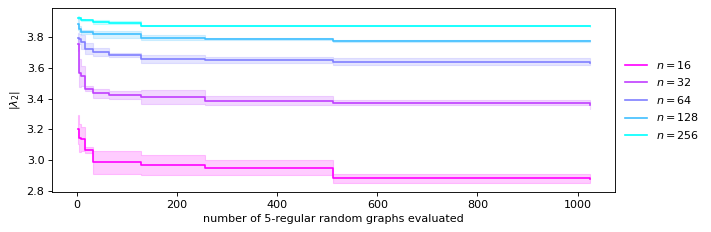

In [125]:
ts = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# ts = [2, 4, 8, 16, 32]

# ns = [16, 32, 64, 128, 256, 512]
ns = [16, 32, 64, 128, 256]
c = discrete_cmap(len(ns), base_cmap="cool").reversed()

seeds = 3

plt.figure(figsize=(9, 3), dpi=80)

for i, n in enumerate(ns):
    lams_all = []
    for s in range(seeds):
        lams = []
        for j, t in enumerate(ts):
            if j > 0:
                G, lam = generate_expander(
                    n, d, lam=lams[-1], trials_so_far=sum(ts[: j - 1]), trials=t
                )
            else:
                G, lam = generate_expander(n, d, trials=t)
            lams.append(lam)
        lams_all.append(lams)

    lams_all = np.array(lams_all)
    mean = lams_all.mean(axis=0)
    std = lams_all.std(axis=0)
    plt.step(ts, lams_all.mean(axis=0), where="post", label=rf"$n={n}$", color=c(i))
    plt.fill_between(ts, mean - std, mean + std, alpha=0.2, step="post", color=c(i))

# plt.xscale("log")
plt.ylabel(r"$|\lambda_2|$")
plt.xlabel(f"number of {d}-regular random graphs evaluated")
plt.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("/Users/nick11roberts/Desktop/n_scaling_cool_1.pdf")
plt.show()

# zig-zag product 

100%|██████████| 1000/1000 [00:01<00:00, 769.82it/s]


3.64421594424749


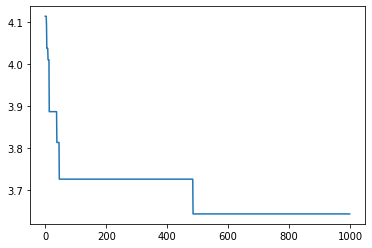

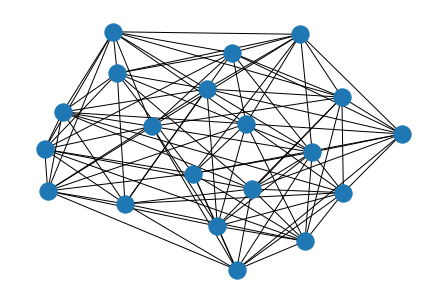

100%|██████████| 1000/1000 [00:00<00:00, 2359.49it/s]


2.2360679774997902


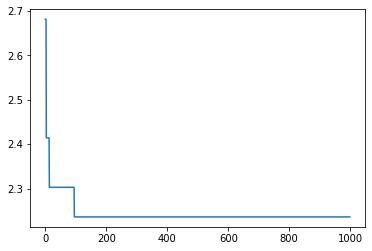

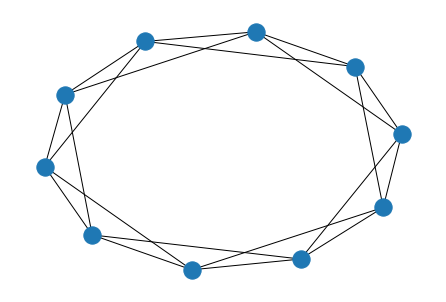

In [157]:
trials = 1_000

n1 = 20
d1 = 10
G1, _, lams = generate_expander(n1, d1, trials=trials, return_lams=True)
print(lams[-1])

plt.plot(lams)
plt.show()

nx.draw(G1)
plt.show()


# n2 = d1
d2 = 4
G2, _, lams = generate_expander(d1, d2, trials=trials, return_lams=True)
print(lams[-1])

plt.plot(lams)
plt.show()

nx.draw(G2)
plt.show()

{(0, 0): (1, 0),
 (0, 1): (2, 0),
 (0, 2): (3, 0),
 (0, 3): (4, 0),
 (0, 4): (9, 0),
 (1, 0): (0, 0),
 (1, 1): (2, 1),
 (1, 2): (5, 0),
 (1, 3): (6, 0),
 (1, 4): (9, 0),
 (2, 0): (0, 1),
 (2, 1): (1, 1),
 (2, 2): (3, 1),
 (2, 3): (6, 1),
 (2, 4): (9, 0),
 (3, 0): (0, 2),
 (3, 1): (2, 2),
 (3, 2): (4, 1),
 (3, 3): (9, 0),
 (4, 0): (0, 3),
 (4, 1): (3, 2),
 (4, 2): (7, 0),
 (4, 3): (9, 1),
 (5, 0): (1, 2),
 (5, 1): (6, 2),
 (5, 2): (7, 1),
 (5, 3): (8, 0),
 (5, 4): (9, 2),
 (6, 0): (1, 3),
 (6, 1): (2, 3),
 (6, 2): (5, 1),
 (6, 3): (8, 1),
 (6, 4): (9, 2),
 (7, 0): (4, 2),
 (7, 1): (5, 2),
 (7, 2): (8, 2),
 (7, 3): (9, 2),
 (8, 0): (5, 3),
 (8, 1): (6, 3),
 (8, 2): (7, 2),
 (8, 3): (9, 3),
 (9, 0): (3, 3),
 (9, 1): (4, 3),
 (9, 2): (7, 3),
 (9, 3): (8, 3),
 (9, 4): (9, 4)}

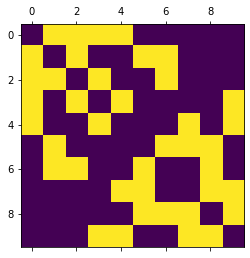

In [190]:
M2 = nx.adjacency_matrix(G2).toarray()

rot_G2 = {
    (u, M2[u, :v].sum()): (v, M2[v, :u].sum())
    for u in range(len(M2))
    for v in range(len(M2))
}


plt.matshow(M2)

rot_G2

In [302]:
def g_2_rot(G):
    rot_G = {}
    for v in G.nodes():
        neighbors = sorted(list(G.neighbors(v)))
        for i in range(len(neighbors)):
            w = neighbors[i]
            j = sorted(list(G.neighbors(w))).index(v)
            rot_G[(v, i)] = (w, j)

    # Validate rotation map
    ks = list(rot_G.keys())
    for i in range(len(ks)):
        assert rot_G[rot_G[ks[i]]] == ks[i]

    return rot_G


def rot_2_g(rot_G, N, N1=None, D1=None):
    if not N1 and not D1:
        M = np.zeros([N, N])
    else:
        M = np.zeros([N1, D1, N1, D1])
    for k in rot_G.keys():
        (v, _) = k
        (w, _) = rot_G[k]
        if type(v) == int:
            # NOTE v, w might not be integers...
            M[v, w] = 1
            M[w, v] = 1
        else:
            assert type(v) == tuple
            (v_, k_) = v
            (w_, l_) = w
            M[v_, k_, w_, l_] = 1
            M[w_, l_, v_, k_] = 1
    M = M.reshape((N, N))
    return nx.from_numpy_array(M)

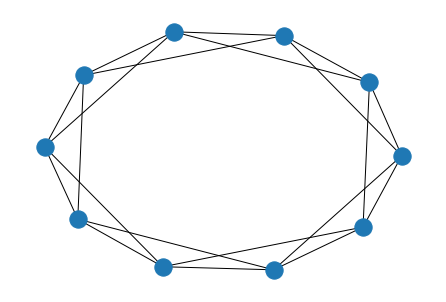

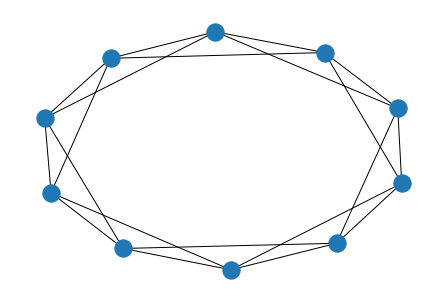

In [303]:
rot_G1 = g_2_rot(G1)
rot_G2 = g_2_rot(G2)

G = G2

nx.draw(G)
plt.show()

nx.draw(rot_2_g(g_2_rot(G), N=len(G.nodes)))
plt.show()

In [305]:
def rot_zigzagproduct(G1, G2, D1, D2):
    rot_G1 = g_2_rot(G1)
    rot_G2 = g_2_rot(G2)

    N1 = len(G1.nodes)
    N2 = len(G2.nodes)  # D1
    assert D1 == N2

    # Now we construct the rotation map for G1 \oz G2
    rot_zigzag = {}
    for v in range(N1):
        for k in range(D1):
            for i in range(D2):
                for j in range(D2):
                    (k_, i_) = rot_G2[(k, i)]
                    (w, l_) = rot_G1[(v, k_)]
                    (l, j_) = rot_G2[(l_, j)]
                    rot_zigzag[((v, k), (i, j))] = ((w, l), (j_, i_))

    return rot_2_g(rot_zigzag, N=N1 * D1, N1=N1, D1=D1)

In [306]:
G1_z_G2 = rot_zigzagproduct(G1, G2, d1, d2)
print(G1_z_G2)

Graph with 200 nodes and 1600 edges


In [307]:
def get_lambda(G):
    A = nx.adjacency_matrix(G).toarray()
    eig = np.linalg.eig(A)[0]
    eig_abs_sorted = sorted(np.abs(eig))
    l2 = eig_abs_sorted[-2]
    return l2

In [309]:
get_lambda(G1_z_G2)

9.881824468088563

In [308]:
get_lambda(G1) + get_lambda(G2) + (get_lambda(G2) ** 2)

10.880283921747282

# Extremely simplified zig-zag product algorithm

100%|██████████| 10/10 [00:00<00:00, 2265.11it/s]

1.0


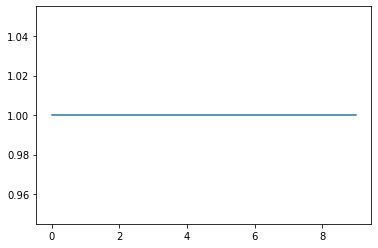

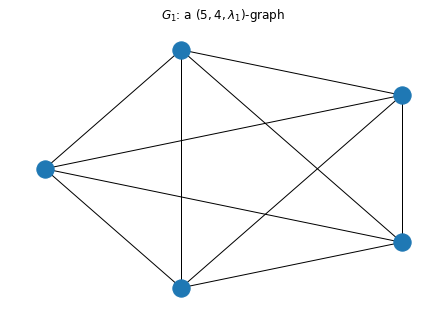

100%|██████████| 10/10 [00:00<00:00, 2895.82it/s]

1.0


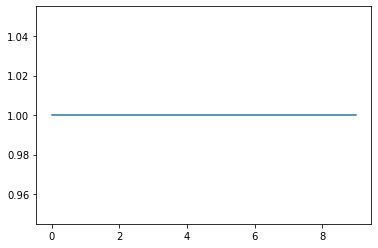

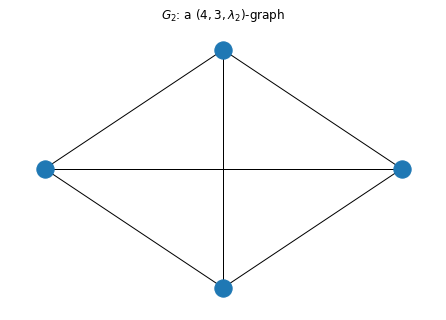

In [397]:
trials = 10

n1 = 5
d1 = 4
G1, _, lams = generate_expander(n1, d1, trials=trials, return_lams=True)
print(lams[-1])

plt.plot(lams)
plt.show()

nx.draw(G1, pos=nx.shell_layout(G1))
plt.title(r"$G_1$: a $(5, 4, \lambda_1)$-graph")
plt.show()


# n2 = d1
d2 = 3
G2, _, lams = generate_expander(d1, d2, trials=trials, return_lams=True)
print(lams[-1])

plt.plot(lams)
plt.show()

nx.draw(G2, pos=nx.shell_layout(G2))
plt.title(r"$G_2$: a $(4, 3, \lambda_2)$-graph")
plt.show()

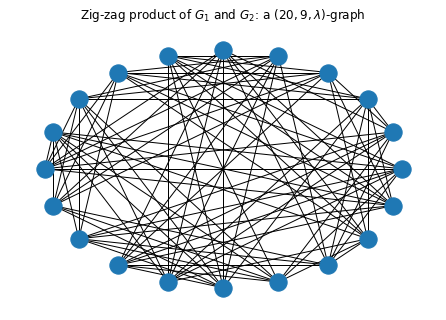

In [399]:
Gprod = rot_zigzagproduct(G1, G2, D1=d1, D2=d2)
# d2**2-regular graph on N1 x D1 vertices

nx.draw(Gprod, pos=nx.shell_layout(Gprod))
plt.title(r"Zig-zag product of $G_1$ and $G_2$: a $(20, 9, \lambda)$-graph")
plt.show()

In [371]:
D = 2
H, _, lams = generate_expander(D**8, D, trials=10, return_lams=True)

100%|██████████| 10/10 [00:00<00:00, 22.23it/s]


1.9999999999999978

In [372]:
get_lambda(H)

1.9999999999999978